In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded file as a CSV
file_path = '/Users/aliahmed/Downloads/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the columns of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      3339 non-null   object 
 1   airline_sentiment             3339 non-null   object 
 2   airline_sentiment_confidence  3339 non-null   float64
 3   negativereason                2134 non-null   object 
 4   negativereason_confidence     2450 non-null   float64
 5   airline                       3338 non-null   object 
 6   name                          3338 non-null   object 
 7   retweet_count                 3338 non-null   float64
 8   text                          3338 non-null   object 
 9   tweet_created                 3243 non-null   object 
 10  tweet_location                2319 non-null   object 
 11  user_timezone                 2231 non-null   object 
dtypes: float64(3), object(9)
memory usage: 313.2+ KB


(None,
      tweet_id airline_sentiment  airline_sentiment_confidence negativereason  \
 0  Tr_tweet_1           neutral                        1.0000            NaN   
 1  Tr_tweet_2          positive                        0.3486            NaN   
 2  Tr_tweet_3           neutral                        0.6837            NaN   
 3  Tr_tweet_4          negative                        1.0000     Bad Flight   
 4  Tr_tweet_5          negative                        1.0000     Can't Tell   
 
    negativereason_confidence         airline        name  retweet_count  \
 0                        NaN  Virgin America     cairdin            0.0   
 1                     0.0000  Virgin America    jnardino            0.0   
 2                        NaN  Virgin America  yvonnalynn            0.0   
 3                     0.7033  Virgin America    jnardino            0.0   
 4                     1.0000  Virgin America    jnardino            0.0   
 
                                               

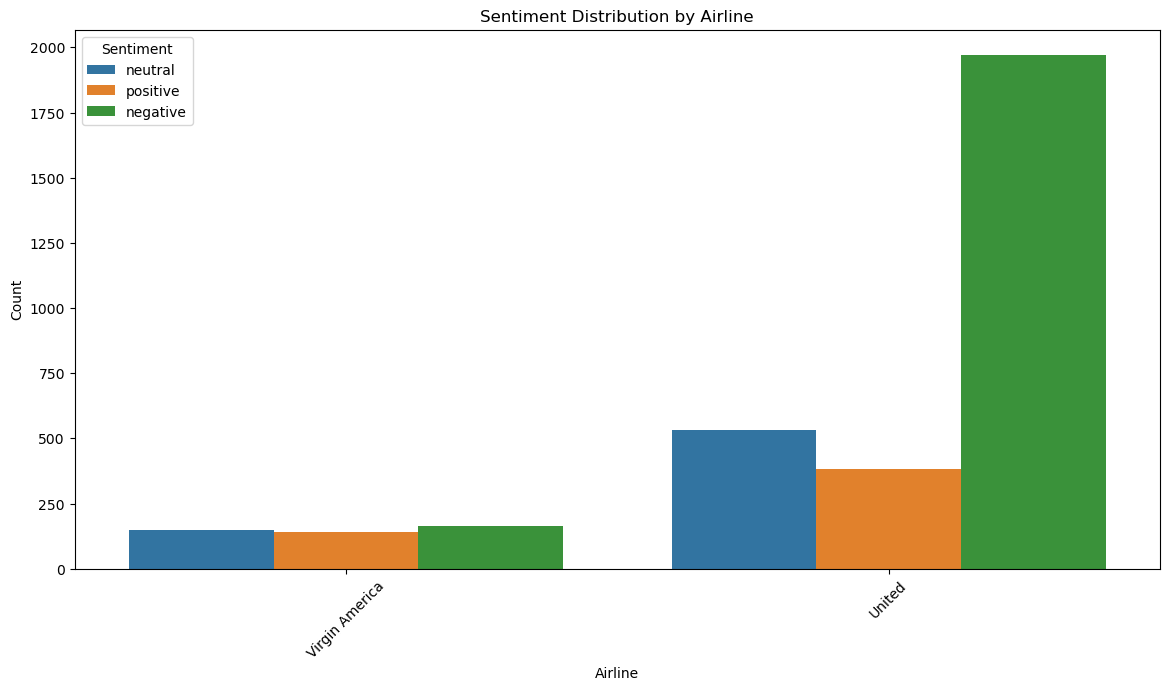

In [2]:
# Plotting the sentiment distribution for different airlines
plt.figure(figsize=(14, 7))
sns.countplot(x='airline', hue='airline_sentiment', data=data)
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

## Sentiment Distribution by Airline

**Summary**: This graph shows the distribution of tweet sentiments (positive, neutral, negative) for different airlines.
**Conclusion**: The sentiment distribution reveals how passengers perceive various airlines. Some airlines receive more negative feedback compared to positive, indicating potential areas for service improvement.


In [4]:
data['airline'].unique()

array(['Virgin America', 'United', nan], dtype=object)

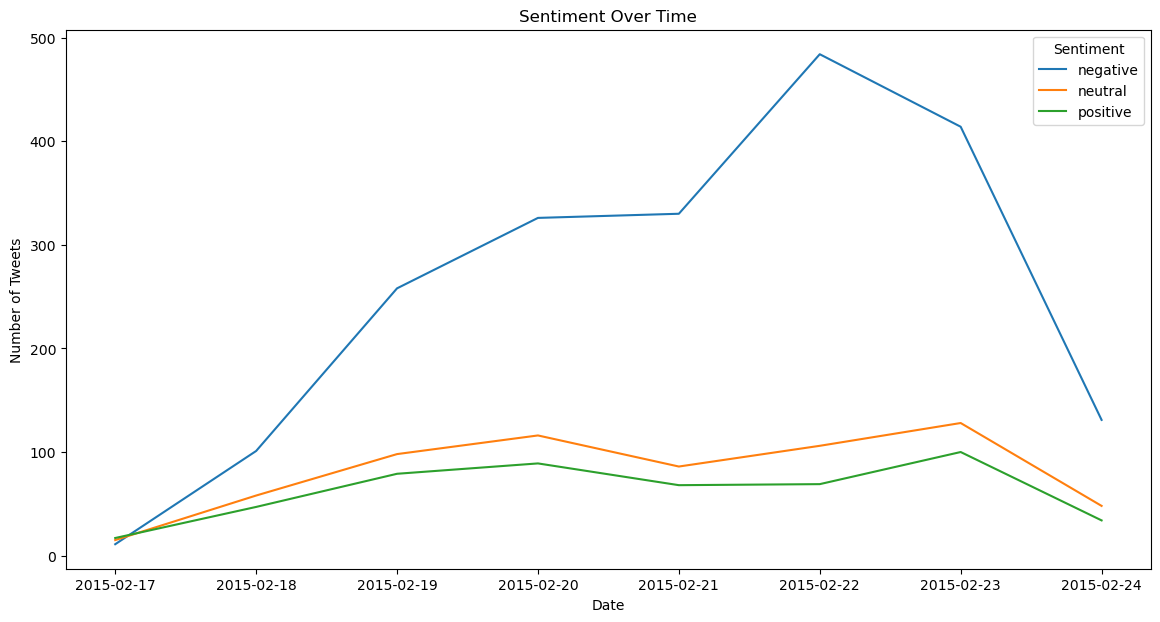

In [5]:
# Convert tweet_created to datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'], errors='coerce')

# Extract date only for aggregation
data['tweet_date'] = data['tweet_created'].dt.date

# Group by date and sentiment
sentiment_over_time = data.groupby(['tweet_date', 'airline_sentiment']).size().unstack(fill_value=0)

# Plotting sentiment over time
plt.figure(figsize=(14, 7))
sentiment_over_time.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()


## Sentiment Over Time

**Summary**: This line graph illustrates how tweet sentiments change over time for different airlines.
**Conclusion**: Tracking sentiment trends over time helps identify periods with significant changes in customer sentiment. Such fluctuations may correlate with specific events or incidents, providing actionable insights for airlines to address timely issues.



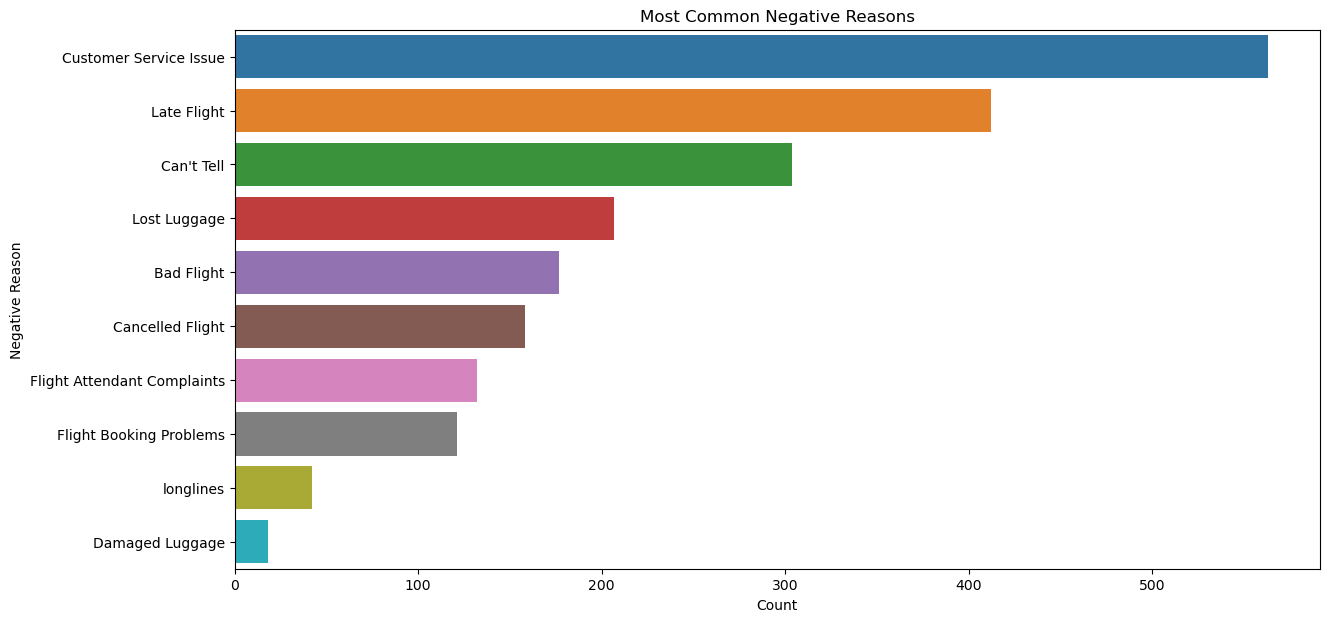

In [7]:
# Plotting the most common negative reasons
plt.figure(figsize=(14, 7))
sns.countplot(y='negativereason', data=data, order=data['negativereason'].value_counts().index)
plt.title('Most Common Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()


## Most Common Negative Reasons

**Summary**: This bar graph shows the most common reasons for negative sentiments in the tweets.
**Conclusion**: Understanding the primary issues and complaints helps airlines prioritize areas for improvement. Addressing these common negative reasons can lead to better customer satisfaction.



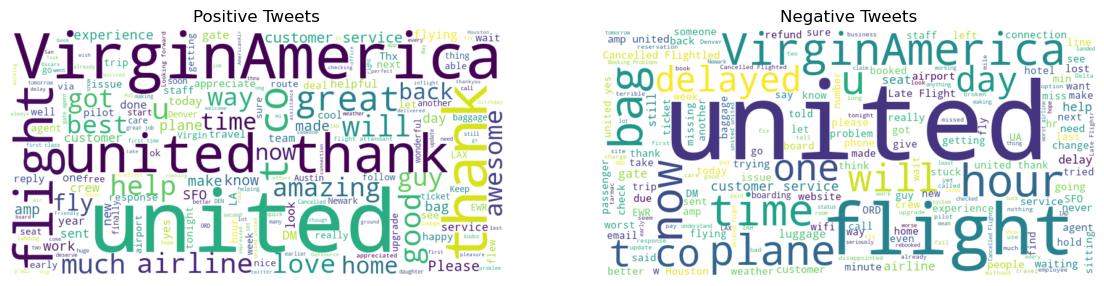

In [9]:
from wordcloud import WordCloud

# Separate positive and negative tweets
positive_tweets = ' '.join(data[data['airline_sentiment'] == 'positive']['text'].dropna())
negative_tweets = ' '.join(data[data['airline_sentiment'] == 'negative']['text'].dropna())

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

# Display word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets')

plt.show()


## Word Cloud for Positive Tweets

**Summary**: A word cloud that visualizes the most frequent words used in positive tweets.
**Conclusion**: The word cloud highlights commonly appreciated aspects and services of airlines. Positive feedback often revolves around specific experiences that can be further enhanced to maintain high customer satisfaction.

## Word Cloud for Negative Tweets

**Summary**: A word cloud that visualizes the most frequent words used in negative tweets.
**Conclusion**: The word cloud helps identify common complaints and negative experiences of passengers. Addressing these issues can lead to significant improvements in customer perceptions and service quality.




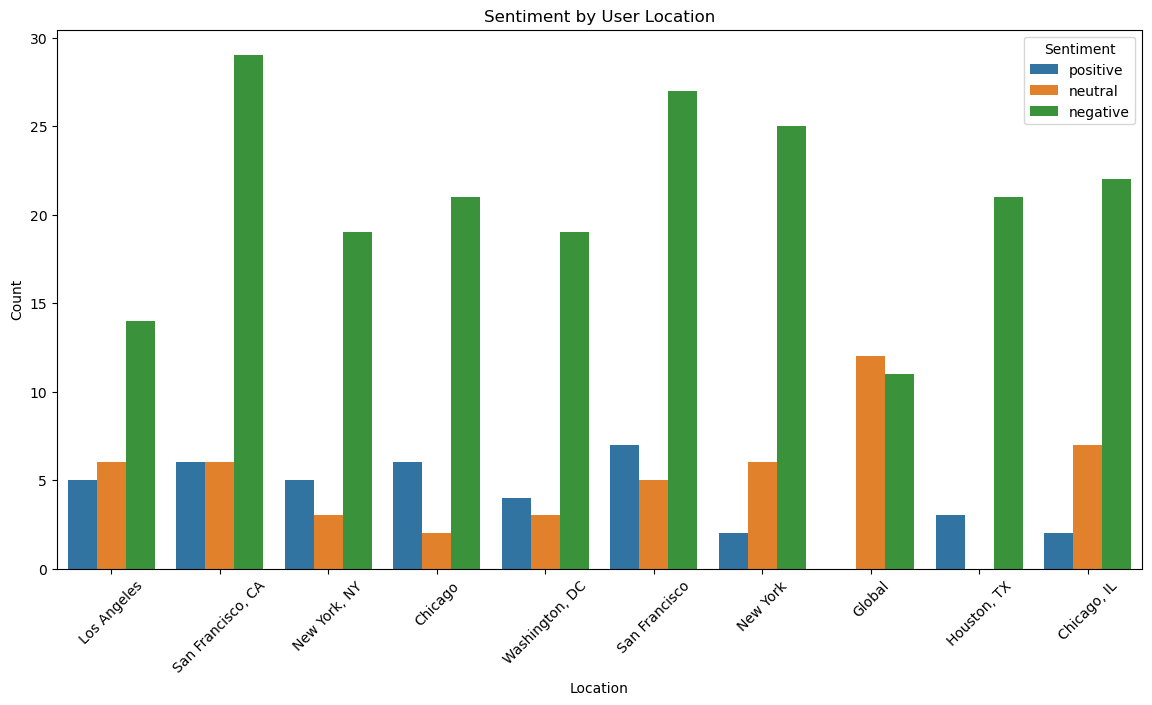

In [11]:
# Plotting sentiment distribution by user location
plt.figure(figsize=(14, 7))
top_locations = data['tweet_location'].value_counts().nlargest(10).index
sns.countplot(x='tweet_location', hue='airline_sentiment', data=data[data['tweet_location'].isin(top_locations)])
plt.title('Sentiment by User Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


## Sentiment by User Location

**Summary**: This graph shows the sentiment distribution of tweets based on user locations.
**Conclusion**: Geographical variations in passenger sentiments reveal regional differences in customer satisfaction. Airlines can tailor their services and address region-specific issues to improve overall customer experience.




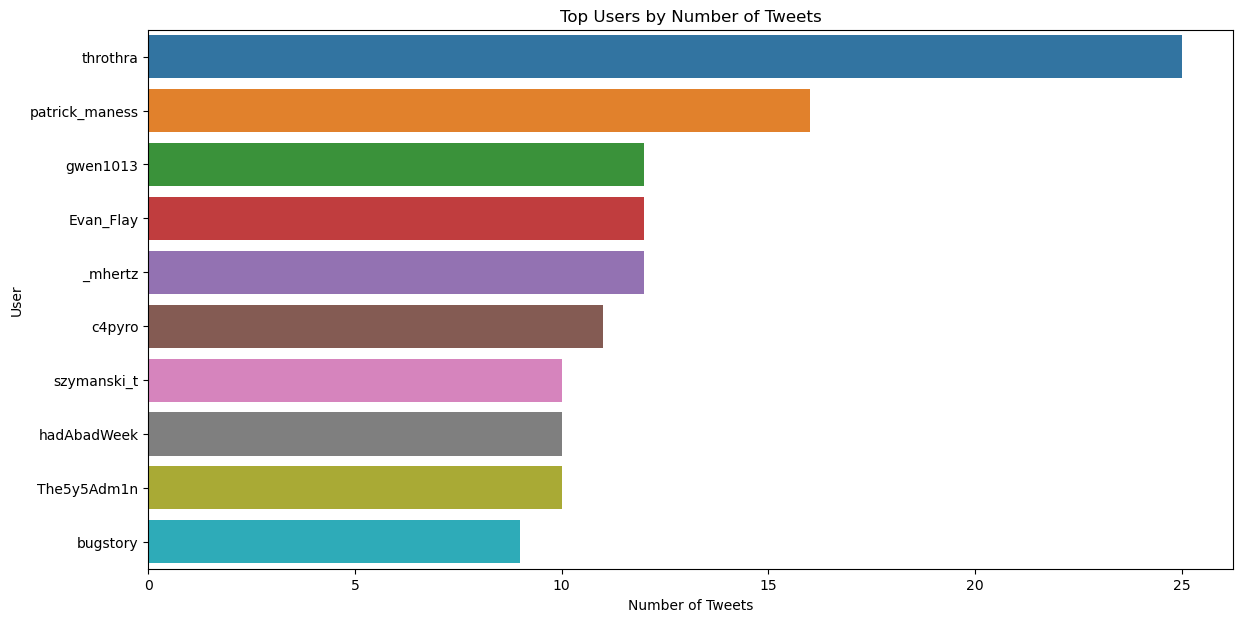

In [13]:
# Plotting top users by number of tweets
plt.figure(figsize=(14, 7))
top_users = data['name'].value_counts().nlargest(10)
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()


## Top Users by Number of Tweets

**Summary**: This bar graph identifies the users who tweet the most about airlines.
**Conclusion**: Identifying highly active users who frequently engage with airlines on Twitter can help airlines find potential brand advocates or critics. Engaging with these users can foster better customer relations and brand loyalty.




In [15]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load the dataset
file_path = '/Users/aliahmed/Downloads/train.csv'
data = pd.read_csv(file_path)

# Improved preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#\w+', '', text)  # Remove hashtags
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
    else:
        text = ""
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)

# Tokenize and remove stop words
stop_words = stopwords.words('english')

def tokenize(text):
    return [word for word in text.split() if word not in stop_words]

data['tokens'] = data['cleaned_text'].apply(tokenize)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aliahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import gensim
import gensim.corpora as corpora
from pprint import pprint

# Create Dictionary and Corpus
id2word = corpora.Dictionary(data['tokens'])
texts = data['tokens']
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Print the topics
pprint(lda_model.print_topics())


[(0,
  '0.018*"gate" + 0.013*"back" + 0.012*"hours" + 0.012*"seat" + 0.010*"take" + '
  '0.010*"could" + 0.010*"ord" + 0.010*"booking" + 0.009*"sitting" + '
  '0.009*"two"'),
 (1,
  '0.027*"thanks" + 0.022*"thank" + 0.013*"airline" + 0.011*"$" + '
  '0.010*"booked" + 0.010*"&amp;" + 0.010*"going" + 0.010*"crew" + '
  '0.009*"you." + 0.009*"worst"'),
 (2,
  '0.024*"-" + 0.018*"help" + 0.017*"please" + 0.015*"waiting" + '
  '0.014*"can\'t" + 0.013*"sent" + 0.011*"way" + 0.011*"airport" + '
  '0.010*"without" + 0.010*"dm"'),
 (3,
  '0.061*"flight" + 0.025*"get" + 0.015*"i\'m" + 0.013*"still" + '
  '0.013*"cancelled" + 0.012*"time" + 0.012*"customer" + 0.012*"us" + '
  '0.012*"delayed" + 0.011*"need"'),
 (4,
  '0.016*"got" + 0.015*"bag" + 0.013*"&amp" + 0.012*":" + 0.011*"last" + '
  '0.009*"made" + 0.008*"yes" + 0.008*"change" + 0.007*"hrs" + 0.007*"+"')]


In [17]:
import spacy

# Load a larger spacy model
nlp = spacy.load("en_core_web_trf")

# Apply NER
data['entities'] = data['text'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(preprocess_text(x)).ents])

# Display first few rows with entities
print(data[['text', 'entities']].head())



                                                text         entities
0                @VirginAmerica What @dhepburn said.               []
1  @VirginAmerica plus you've added commercials t...               []
2  @VirginAmerica I didn't today... Must mean I n...  [(today, DATE)]
3  @VirginAmerica it's really aggressive to blast...               []
4  @VirginAmerica and it's a really big bad thing...               []


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Encode the sentiment labels
data['sentiment'] = data['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['text'].apply(preprocess_text), data['sentiment'], test_size=0.2, random_state=42)

# Build a pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

# Train the model
text_clf.fit(X_train, y_train)

# Predict on test data
y_pred = text_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.97      0.82       416
           1       0.63      0.25      0.35       138
           2       0.85      0.39      0.53       114

    accuracy                           0.72       668
   macro avg       0.73      0.53      0.57       668
weighted avg       0.72      0.72      0.68       668

Accuracy: 0.718562874251497


In [40]:
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Assuming `data` is already loaded and processed as shown before

# Filter out null values from the airline column
valid_airlines = data['airline'].dropna().unique()

# Create the dropdown options list
dropdown_options = [{'label': airline, 'value': airline} for airline in valid_airlines if airline]

# Prepare the app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = html.Div([
    html.H1("Airline Sentiment Analysis"),
    dcc.Dropdown(
        id='airline-dropdown',
        options=dropdown_options,
        value=valid_airlines[0]  # Set a default value from valid airlines
    ),
    dcc.Graph(id='sentiment-distribution'),
    dcc.Graph(id='sentiment-over-time'),
])

# Updated Callbacks
@app.callback(
    [Output('sentiment-distribution', 'figure'),
     Output('sentiment-over-time', 'figure')],
    [Input('airline-dropdown', 'value')]
)
def update_graphs(selected_airline):
    filtered_data = data[data['airline'] == selected_airline]

    if filtered_data.empty:
        return {}, {}

    sentiment_distribution = px.histogram(filtered_data, x='airline_sentiment', title='Sentiment Distribution')
    
    # Ensure tweet_created exists and is in datetime format
    if 'tweet_created' in filtered_data.columns:
        filtered_data['tweet_created'] = pd.to_datetime(filtered_data['tweet_created'], errors='coerce')
        filtered_data.dropna(subset=['tweet_created'], inplace=True)
        
        # Aggregate data by day
        daily_sentiment = filtered_data.groupby([filtered_data['tweet_created'].dt.date, 'airline_sentiment']).size().unstack().fillna(0)
        
        sentiment_over_time = px.line(daily_sentiment, title='Sentiment Over Time')
    else:
        sentiment_over_time = {}

    return sentiment_distribution, sentiment_over_time

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
